In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [115]:
url = "/content/drive/MyDrive/house.csv"
df = pd.read_csv(url)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [117]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Tratamiento de valores nulos

In [118]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [119]:
print(df['total_bedrooms'].mean())
print('____'*5)
print(df['total_bedrooms'].median())
print('____'*5)
print(df['total_bedrooms'].mode())

537.8705525375618
____________________
435.0
____________________
0    280.0
Name: total_bedrooms, dtype: float64


In [120]:
media = df['total_bedrooms'].median()
media

435.0

In [121]:
df['total_bedrooms'].fillna(media, inplace = True)

In [122]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

# EDA

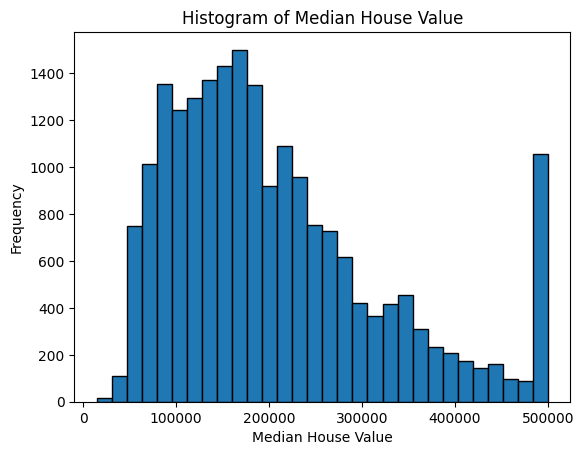

In [123]:
plt.hist(df['median_house_value'], bins=30, edgecolor='k')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Histogram of Median House Value')
plt.show()

## median_income

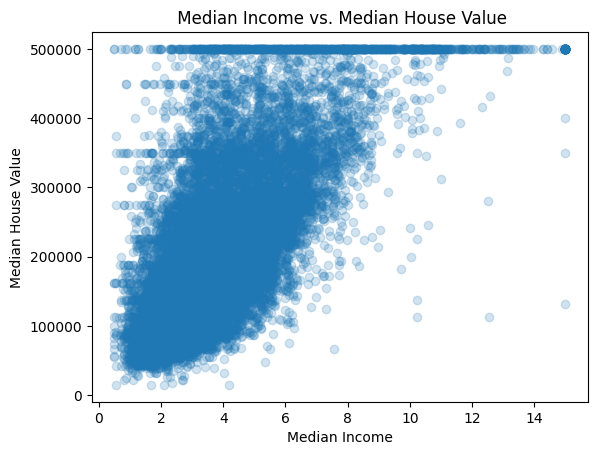

In [124]:
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.2)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title(' Median Income vs. Median House Value')
plt.show()

In [125]:
correlation_matrix = df[['median_income', 'median_house_value']].corr()
print(correlation_matrix)


                    median_income  median_house_value
median_income            1.000000            0.688075
median_house_value       0.688075            1.000000


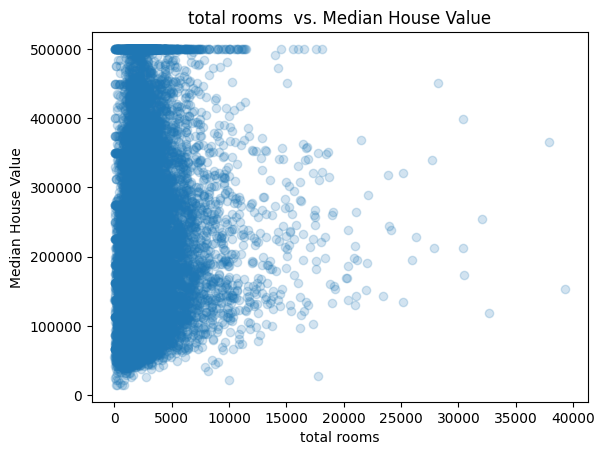

In [126]:
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.2)
plt.xlabel('total rooms')
plt.ylabel('Median House Value')
plt.title('total rooms  vs. Median House Value')
plt.show()

In [127]:
correlation_matrix = df[['total_rooms', 'median_house_value']].corr()
print(correlation_matrix)


                    total_rooms  median_house_value
total_rooms            1.000000            0.134153
median_house_value     0.134153            1.000000


## Population

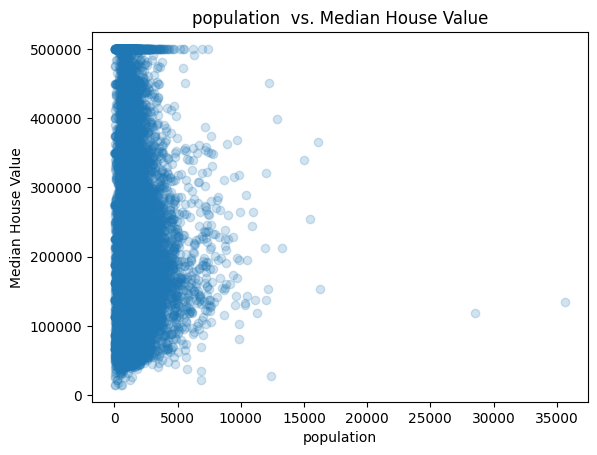

In [128]:
plt.scatter(df['population'], df['median_house_value'], alpha=0.2)
plt.xlabel('population')
plt.ylabel('Median House Value')
plt.title('population  vs. Median House Value')
plt.show()

In [129]:
correlation_matrix = df[['population', 'median_house_value']].corr()
print(correlation_matrix)


                    population  median_house_value
population             1.00000            -0.02465
median_house_value    -0.02465             1.00000


## housing_median_age

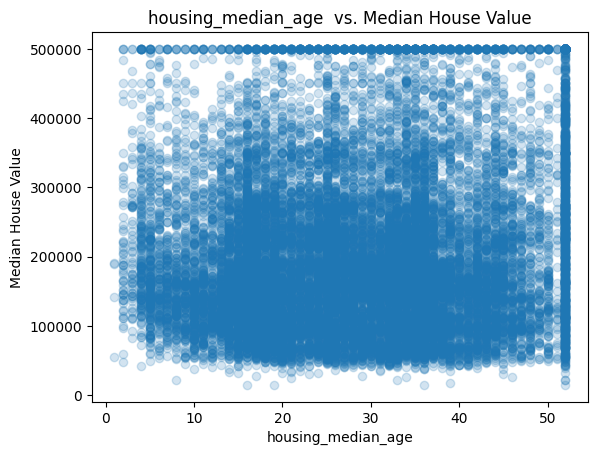

In [130]:
plt.scatter(df['housing_median_age'], df['median_house_value'], alpha=0.2)
plt.xlabel('housing_median_age')
plt.ylabel('Median House Value')
plt.title('housing_median_age  vs. Median House Value')
plt.show()

In [131]:
correlation_matrix = df[['housing_median_age', 'median_house_value']].corr()
print(correlation_matrix)


                    housing_median_age  median_house_value
housing_median_age            1.000000            0.105623
median_house_value            0.105623            1.000000


## households

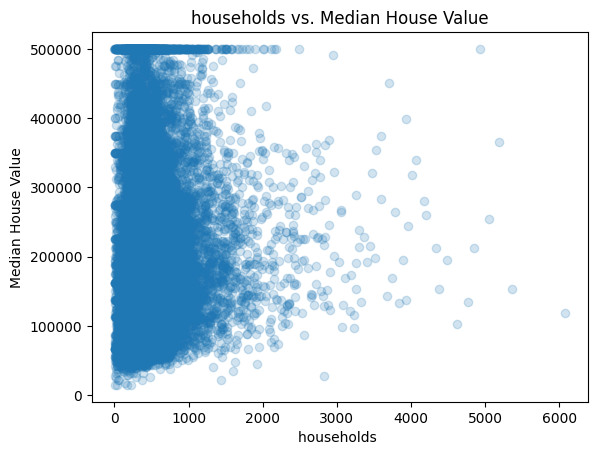

In [132]:
plt.scatter(df['households'], df['median_house_value'], alpha=0.2)
plt.xlabel('households ')
plt.ylabel('Median House Value')
plt.title('households vs. Median House Value')
plt.show()

In [133]:
correlation_matrix = df[['households', 'median_house_value']].corr()
print(correlation_matrix)

                    households  median_house_value
households            1.000000            0.065843
median_house_value    0.065843            1.000000


# RFE

In [134]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [135]:
columns = ['median_house_value', 'ocean_proximity']

In [136]:
X = df.drop(columns, axis=1)
y = df['median_house_value']

In [137]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41,880,129.0,322,126,8.3252
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014
2,-122.24,37.85,52,1467,190.0,496,177,7.2574
3,-122.25,37.85,52,1274,235.0,558,219,5.6431
4,-122.25,37.85,52,1627,280.0,565,259,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603
20636,-121.21,39.49,18,697,150.0,356,114,2.5568
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
model  = LinearRegression()

In [140]:
num_features_to_select = 5
rfe = RFE(model,n_features_to_select=num_features_to_select)

In [141]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [142]:
X_rfe = rfe.fit_transform(X, y)

In [143]:
selected_features = X.columns[rfe.ranking_ == 1]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['longitude', 'latitude', 'housing_median_age', 'total_bedrooms',
       'median_income'],
      dtype='object')


In [144]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [145]:
df.corr()

<ipython-input-145-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Realizar predicciones en el conjunto de prueba
y_pred = rfe.predict(X_test)

# Calcular el error cuadrático medio (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R-squared)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Mostrar las métricas calculadas
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 5381177511.927845
R-squared: 0.5893512940401577
Mean Absolute Error: 53915.07526757209
Root Mean Squared Error: 73356.50967656412


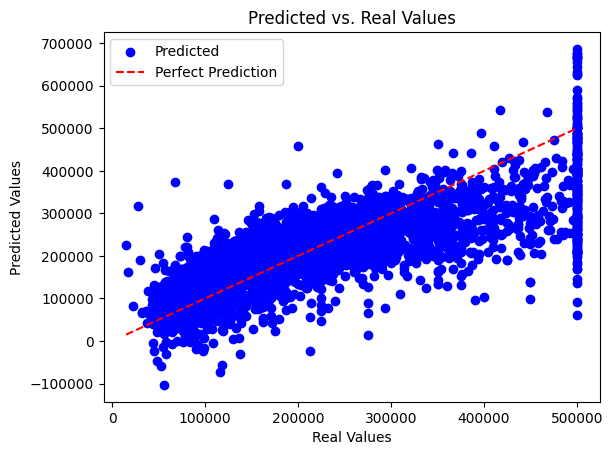

In [149]:
import matplotlib.pyplot as plt

# Supongamos que tienes múltiples características y una variable objetivo
# X_test es un DataFrame con las características
# y_test es un array con las predicciones

# Calcular las predicciones utilizando el modelo
y_pred = rfe.predict(X_test)

# Graficar las predicciones en función de la variable objetivo real
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

# Etiquetas y título
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Real Values')
plt.legend()

# Mostrar el gráfico
plt.show()


# Regresión lineal univariable

In [156]:
X = df[['median_income']]
y = df['median_house_value']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
model  = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [160]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7091157771.76555
R-squared: 0.45885918903846656


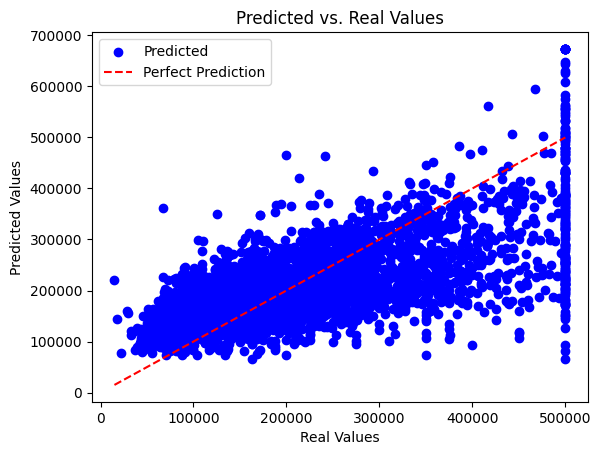

In [161]:
import matplotlib.pyplot as plt

# Supongamos que tienes múltiples características y una variable objetivo
# X_test es un DataFrame con las características
# y_test es un array con las predicciones

# Calcular las predicciones utilizando el modelo
y_pred = model.predict(X_test)

# Graficar las predicciones en función de la variable objetivo real
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

# Etiquetas y título
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Real Values')
plt.legend()

# Mostrar el gráfico
plt.show()

## Cross validation

In [164]:

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que X es la matriz de características y y es la variable objetivo
columns = ['median_house_value', 'ocean_proximity']

X = df.drop(columns, axis=1)
y = df['median_house_value']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Realizar validación cruzada y obtener las predicciones
y_pred = cross_val_predict(rfe, X, y, cv=5)  # cv=5 significa 5-fold cross-validation

# Calcular métricas para evaluar el rendimiento
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Mostrar las métricas calculadas
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5588893026.152096
R-squared: 0.580271730943343


# Regreasion lineal y Random forest

In [170]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Supongamos que X es la matriz de características y y es la variable objetivo
X = df.drop(columns, axis=1)
y = df['median_house_value']

# Definir una función para realizar validación cruzada y obtener el mejor modelo
def get_best_model(X, y, models):
    best_model = None
    best_score = float('inf')  # Inicializar con un valor muy alto

    for model_name, model in models.items():
        scores = cross_val_score(rfe, X, y, cv=5, scoring='neg_mean_squared_error', error_score='raise')  # Utilizar MSE para comparar modelos
        mean_score = -scores.mean()  # Convertir a positivo el negativo del MSE

        if mean_score < best_score:
            best_score = mean_score
            best_model = model_name

    return best_model

# Definir los modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Obtener el mejor modelo
best_model_name = get_best_model(X, y, models)
print("El mejor modelo es:", best_model_name)


El mejor modelo es: Linear Regression


In [176]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error



# Supongamos que X es la matriz de características y y es la variable objetivo
X = df.drop(columns, axis=1)
y = df['median_house_value']

# Definir una función para realizar validación cruzada y obtener el mejor modelo
def get_best_model(X, y, models):
    best_model = None
    best_score = float('inf')  # Inicializar con un valor muy alto

    for model_name, model in models.items():
        y_pred = cross_val_predict(rfe, X, y, cv=5)

        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)

        print(f"Model: {model_name}")
        print("Mean Squared Error:", mse)
        print("Mean Absolute Error:", mae)
        print("R-squared:", r2)

        print("--------------------")

        mean_score = mse  # Puedes usar otras métricas si lo prefieres

        if mean_score < best_score:
            best_score = mean_score
            best_model = model_name

    return best_model

# Definir los modelos a probar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Obtener el mejor modelo
best_model_name = get_best_model(X, y, models)
print("El mejor modelo es:", best_model_name)


Model: Linear Regression
Mean Squared Error: 5588893026.152096
Mean Absolute Error: 55537.962361024656
R-squared: 0.580271730943343
--------------------
Model: Ridge
Mean Squared Error: 5588893026.152096
Mean Absolute Error: 55537.962361024656
R-squared: 0.580271730943343
--------------------
Model: Lasso
Mean Squared Error: 5588893026.152096
Mean Absolute Error: 55537.962361024656
R-squared: 0.580271730943343
--------------------
Model: Random Forest Regressor
Mean Squared Error: 5588893026.152096
Mean Absolute Error: 55537.962361024656
R-squared: 0.580271730943343
--------------------
El mejor modelo es: Linear Regression
